**Context:**
In hospitals, medical treatments and surgeries can be categorized into inpatient and outpatient procedures.
For patients, it is important to understand the difference between these two types of care, because they impact the length of a patient’s stay in a medical facility and the cost of a procedure.

# Build A Predictive Model

**Problem Statement:** Implement a single neuron neural network, aka, the logistic regression unit. Use Log Loss Function, write code to carry out stochastic gradient descent for optimization, and then write a different activation function i.e., replace the sigmoid compression by ReLu or tan. Implement as a set of functions. Run it on any classification problem using the dataset "Patient Treatment Classification". Provide accuracy and F1 score of the results.

**Importing Libraries**

In [465]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### **Performing EDA**

In [466]:
raw_data = pd.read_csv("https://raw.githubusercontent.com/SathwikHegde/Advance-Data-Science/main/PatientHealth.csv?token=GHSAT0AAAAAAB2HXWWHG6P4QUMKLISNCOS4Y36Q4DA")

In [467]:
print(raw_data.shape)

(4412, 11)


In [468]:
#Converting Categorical data into Numeric
mapping ={k : v for v, k in enumerate(raw_data.SEX.unique())}
raw_data['SEX']= raw_data.SEX.map(mapping)
X=raw_data

In [469]:
#Converting Categorical data into Numeric
mapping ={k : v for v, k in enumerate(raw_data.SOURCE.unique())}
raw_data['SOURCE']= raw_data.SOURCE.map(mapping)
X=raw_data

In [470]:
raw_data.head()

,HAEMATOCRIT,HAEMOGLOBINS,ERYTHROCYTE,LEUCOCYTE,THROMBOCYTE,MCH,MCHC,MCV,AGE,SEX,SOURCE
0,35.1,11.8,4.65,6.3,310,25.4,33.6,75.5,1,0,0
1,43.5,14.8,5.39,12.7,334,27.5,34.0,80.7,1,0,0
2,33.5,11.3,4.74,13.2,305,23.8,33.7,70.7,1,0,0
3,39.1,13.7,4.98,10.5,366,27.5,35.0,78.5,1,0,0
4,30.9,9.9,4.23,22.1,333,23.4,32.0,73.0,1,1,0


In [471]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4412 entries, 0 to 4411
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HAEMATOCRIT   4412 non-null   float64
 1   HAEMOGLOBINS  4412 non-null   float64
 2   ERYTHROCYTE   4412 non-null   float64
 3   LEUCOCYTE     4412 non-null   float64
 4   THROMBOCYTE   4412 non-null   int64  
 5   MCH           4412 non-null   float64
 6   MCHC          4412 non-null   float64
 7   MCV           4412 non-null   float64
 8   AGE           4412 non-null   int64  
 9   SEX           4412 non-null   int64  
 10  SOURCE        4412 non-null   int64  
dtypes: float64(7), int64(4)
memory usage: 379.3 KB


In [472]:
raw_data.describe()

,HAEMATOCRIT,HAEMOGLOBINS,ERYTHROCYTE,LEUCOCYTE,THROMBOCYTE,MCH,MCHC,MCV,AGE,SEX,SOURCE
count,4412.000000,4412.000000,4412.000000,4412.000000,4412.000000,4412.000000,4412.000000,4412.000000,4412.000000,4412.000000,4412.000000
mean,38.197688,12.741727,4.541260,8.718608,257.524479,28.234701,33.343042,84.612942,46.626473,0.519039,0.404352
std,5.974784,2.079903,0.784091,5.049041,113.972365,2.672639,1.228664,6.859101,21.731218,0.499694,0.490822
min,13.700000,3.800000,1.480000,1.100000,8.000000,14.900000,26.000000,54.000000,1.000000,0.000000,0.000000
25%,34.375000,11.400000,4.040000,5.675000,188.000000,27.200000,32.700000,81.500000,29.000000,0.000000,0.000000
50%,38.600000,12.900000,4.570000,7.600000,256.000000,28.700000,33.400000,85.400000,47.000000,1.000000,0.000000
75%,42.500000,14.200000,5.050000,10.300000,321.000000,29.800000,34.100000,88.700000,64.000000,1.000000,1.000000
max,69.000000,18.900000,7.860000,76.600000,1183.000000,40.800000,39.000000,115.600000,99.000000,1.000000,1.000000


In [473]:
raw_data.isnull().sum().sort_values(ascending=False)

HAEMATOCRIT     0
HAEMOGLOBINS    0
ERYTHROCYTE     0
LEUCOCYTE       0
THROMBOCYTE     0
MCH             0
MCHC            0
MCV             0
AGE             0
SEX             0
SOURCE          0
dtype: int64

In [474]:
percent_missing = raw_data.isnull().sum() * 100 / len(raw_data)
missing_value_data = pd.DataFrame({'column_name': raw_data.columns,'percent_missing': percent_missing})
missing_value_data.sort_values(by='percent_missing', ascending=False)

,column_name,percent_missing
HAEMATOCRIT,HAEMATOCRIT,0.0
HAEMOGLOBINS,HAEMOGLOBINS,0.0
ERYTHROCYTE,ERYTHROCYTE,0.0
LEUCOCYTE,LEUCOCYTE,0.0
THROMBOCYTE,THROMBOCYTE,0.0
MCH,MCH,0.0
MCHC,MCHC,0.0
MCV,MCV,0.0
AGE,AGE,0.0
SEX,SEX,0.0


In [475]:
#Fill null values method 2
raw_data.fillna(raw_data.mean(),)

,HAEMATOCRIT,HAEMOGLOBINS,ERYTHROCYTE,LEUCOCYTE,THROMBOCYTE,MCH,MCHC,MCV,AGE,SEX,SOURCE
0,35.1,11.8,4.65,6.3,310,25.4,33.6,75.5,1,0,0
1,43.5,14.8,5.39,12.7,334,27.5,34.0,80.7,1,0,0
2,33.5,11.3,4.74,13.2,305,23.8,33.7,70.7,1,0,0
3,39.1,13.7,4.98,10.5,366,27.5,35.0,78.5,1,0,0
4,30.9,9.9,4.23,22.1,333,23.4,32.0,73.0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...
4407,32.8,10.4,3.49,8.1,72,29.8,31.7,94.0,92,0,1
4408,33.7,10.8,3.67,6.7,70,29.4,32.0,91.8,92,0,1
4409,33.2,11.2,3.47,7.2,235,32.3,33.7,95.7,93,0,0
4410,31.5,10.4,3.15,9.1,187,33.0,33.0,100.0,98,0,1


In [476]:
# df.isnull().sum().sort_values(ascending=False)
raw_data=raw_data.fillna(raw_data.mean())

In [477]:
raw_data.isnull().sum().sort_values(ascending=False)

HAEMATOCRIT     0
HAEMOGLOBINS    0
ERYTHROCYTE     0
LEUCOCYTE       0
THROMBOCYTE     0
MCH             0
MCHC            0
MCV             0
AGE             0
SEX             0
SOURCE          0
dtype: int64

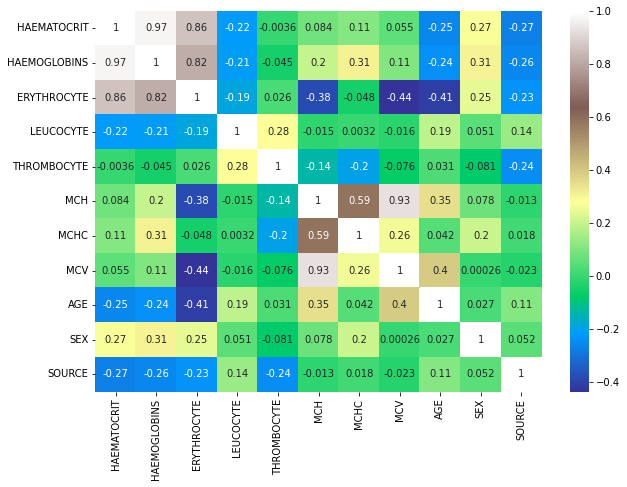

In [478]:
#Checking corelation
sns.heatmap(raw_data.corr(),annot=True, cmap='terrain')
fig=plt.gcf()
fig.set_size_inches(10,7)
plt.show()

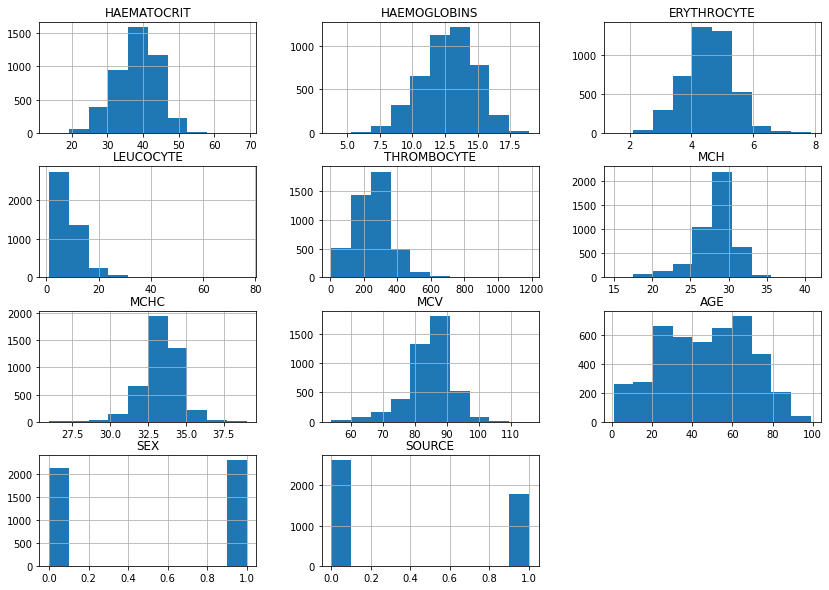

In [479]:
#checking biased data
raw_data.hist(figsize=(14,10))
plt.show()

In [480]:
#Train the Dataset
train_data = raw_data.sample(frac=0.8, random_state=25)
test_data = raw_data.drop(train_data.index)
print(f"Number of testing examples: {test_data.shape[0]}")
print(f"Number of training examples: {train_data.shape[0]}")

Number of testing examples: 882
Number of training examples: 3530


In [481]:
train_data.head()

,HAEMATOCRIT,HAEMOGLOBINS,ERYTHROCYTE,LEUCOCYTE,THROMBOCYTE,MCH,MCHC,MCV,AGE,SEX,SOURCE
3744,38.5,12.7,4.06,4.4,211,31.3,33.0,94.8,70,1,0
3037,39.4,12.3,4.52,17.4,247,27.2,31.2,87.2,60,0,1
2370,35.7,12.0,3.96,2.2,94,30.3,33.6,90.2,50,0,1
2496,40.3,13.8,4.70,5.5,208,29.4,34.2,85.7,53,1,0
425,46.8,15.2,5.20,6.0,370,29.2,32.5,90.0,17,1,0


In [482]:
test_data.head()

,HAEMATOCRIT,HAEMOGLOBINS,ERYTHROCYTE,LEUCOCYTE,THROMBOCYTE,MCH,MCHC,MCV,AGE,SEX,SOURCE
0,35.1,11.8,4.65,6.3,310,25.4,33.6,75.5,1,0,0
10,33.7,11.5,4.57,13.2,322,25.2,34.1,73.7,1,1,0
11,54.0,16.6,7.61,10.0,88,21.8,30.7,71.0,1,0,1
14,34.5,9.8,5.75,15.4,548,17.0,28.4,60.0,1,1,0
20,34.9,11.6,4.71,9.5,275,24.6,33.2,74.1,1,0,0


In [483]:
#Dropping the Outcome from features
x_train_data = train_data.drop('SOURCE',axis=1)
y_train_data = train_data['SOURCE']

In [484]:
x_train_data.head()

,HAEMATOCRIT,HAEMOGLOBINS,ERYTHROCYTE,LEUCOCYTE,THROMBOCYTE,MCH,MCHC,MCV,AGE,SEX
3744,38.5,12.7,4.06,4.4,211,31.3,33.0,94.8,70,1
3037,39.4,12.3,4.52,17.4,247,27.2,31.2,87.2,60,0
2370,35.7,12.0,3.96,2.2,94,30.3,33.6,90.2,50,0
2496,40.3,13.8,4.70,5.5,208,29.4,34.2,85.7,53,1
425,46.8,15.2,5.20,6.0,370,29.2,32.5,90.0,17,1


In [485]:
y_train_data.head()

3744    0
3037    1
2370    1
2496    0
425     0
Name: SOURCE, dtype: int64

In [486]:
x_test_data = test_data.drop('SOURCE',axis=1)
y_test_data = test_data['SOURCE']

In [487]:
x_test_data.head()

,HAEMATOCRIT,HAEMOGLOBINS,ERYTHROCYTE,LEUCOCYTE,THROMBOCYTE,MCH,MCHC,MCV,AGE,SEX
0,35.1,11.8,4.65,6.3,310,25.4,33.6,75.5,1,0
10,33.7,11.5,4.57,13.2,322,25.2,34.1,73.7,1,1
11,54.0,16.6,7.61,10.0,88,21.8,30.7,71.0,1,0
14,34.5,9.8,5.75,15.4,548,17.0,28.4,60.0,1,1
20,34.9,11.6,4.71,9.5,275,24.6,33.2,74.1,1,0


In [488]:
y_test_data.head()

0     0
10    0
11    1
14    0
20    0
Name: SOURCE, dtype: int64

### Defining functions for the LogisticRegression Model

In [489]:
#Reshape the dataset to Numpy array
X_train_data = x_train_data.to_numpy()
Y_train_data = y_train_data.to_numpy()

Y_train_data = Y_train_data.reshape(Y_train_data.shape[0],)

X_test_data = x_test_data.to_numpy()
Y_test_data = y_test_data.to_numpy()
Y_test_data = Y_test_data.reshape(Y_test_data.shape[0],)

In [490]:
# Computing log-loss/Cross-Entropy loss
def loss(y,y_hat):
    '''In this function, we will compute log loss '''
    computed_loss = 0
    for idx in range(len(y)):
        computed_loss += y[idx] * np.log10(y_hat[idx]) + (1-y[idx]) * np.log10(1-y_hat[idx])
    loss = (-1)*computed_loss/len(y)
    return loss

In [491]:
# Calculating gradients for back propogation
def gradients(X, y, y_hat):   
    m = X.shape[0]
    dweight = (1/m)*np.dot(X.T, (y_hat - y))
    dbias = (1/m)*np.sum((y_hat - y))   
    return dweight, dbias

In [492]:
# Function to normalize the dataset
def normalize(X):   
    m, n = X.shape    
    for i in range(n):
        Xnorm = (X - X.mean(axis=0))/X.std(axis=0)       
    return Xnorm

In [493]:
# Sigmoid function for activation
def sigmoid(X):
    return 1.0/(1 + np.exp(-X))

In [494]:
# Relu function for activation
def relu(x): 
    return np.maximum(0,x)

In [495]:
#Accuracy Score function
def accuracy_score(ytrue, ypred):
        accscore = np.sum(np.equal(ytrue, ypred)) / len(ytrue)
        return accscore

In [496]:
# Calculating F1 Score
def f1(ytrue, ypred):
    tp = np.sum(np.multiply([i==True for i in ypred], ytrue))
    tn = np.sum(np.multiply([i==False for i in ypred], [not(j) for j in ytrue]))
    fp = np.sum(np.multiply([i==True for i in ypred], [not(j) for j in ytrue]))
    fn = np.sum(np.multiply([i==False for i in ypred], ytrue))
    prec = tp/(tp+fp)
    recall = tp/(tp+fn)
    if prec != 0 and recall != 0:
        f1 = (2 * prec * recall) / (prec + recall)
    else:
        f1 = 0
    return f1

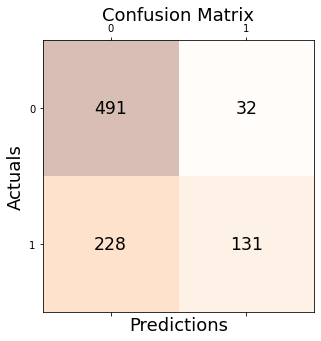

In [497]:
# Print the confusion matrix using Matplotlib
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_true=Y_test_data, y_pred=y_pred)

fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

### Building the logistic regression model with Sigmoid activation function else Relu activation function

**The Sigmoid function is denoted as follows:**

σ(x) = 1 / (1 + e^(-x))
The sigmoid function squeezes the values between (0 to 1) and hence, it is especially useful for models used for predicting the probabilities as the output. Hence, sigmoid function provides a good estimation in logistic regression as the outcome is a probability in the range [0,1].

**The ReLu function is denoted as follows:**

The rectifier or ReLU (rectified linear unit) activation function is an activation function defined as the positive part of its argument:

f(x) = max(0,x)
where x is the input to a neuron.

In [498]:
#Main NeuralNetwork Function
def NeuralNetwork(X, y,activation_func, bs, epochs, lr):    

    m, n = X.shape
    weight = np.zeros((n,1))
    bias = 0
    y = y.reshape(m,1)   
    xnorm = normalize(X)   
    loss1 = []   
    accuracy = []
    

    for epoch in range(epochs):
        for i in range((m-1)//bs + 1):
            
            start_i = i*bs
            end_i = start_i + bs
            xb = X[start_i:end_i]
            yb = y[start_i:end_i]
            
            if activation_func == 'sigmoid':
                y_hat = sigmoid(np.dot(xb, weight) + bias)
            elif activation_func == 'Relu':
                y_hat = relu(np.dot(xb, weight) + bias)

            dw, db = gradients(xb, yb, y_hat)
            

            weight -= lr*dw
            bias -= lr*db
        
        if activation_func == 'sigmoid':
            l = loss(y, sigmoid(np.dot(X, weight) + bias))
        elif activation_func == 'Relu':
            l = loss(y, relu(np.dot(X, weight) + bias))
        loss1.append(l)
        
        accuracy1 = accuracy_score(yb, y_hat)
        accuracy.append(accuracy1)
        
    return weight, bias, accuracy

In [499]:
#Prediction Function using Activation Fucntion sigmoid and relu
def predict(X, activation_func):
    
    x = normalize(X)

    if activation_func == 'sigmoid':
        preds = sigmoid(np.dot(X, weight) + bias)
    elif activation_func == 'Relu':
        preds = relu(np.dot(X, weight) + bias)
    
    pred_class = []
  
    pred_class = [1 if i > 0.5 else 0 for i in preds]
    
    return np.array(pred_class)

### Analyzing the accuracy and f1 score of the model using Sigmoid

In [500]:
weight, bias, acc = NeuralNetwork(X_train_data, Y_train_data,activation_func='sigmoid', bs=100, epochs=1000, lr=0.01)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in exp
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log10
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in multiply
  


In [501]:
#Print Accuracy and F1 score using Sigmoid
ypred = predict(X_test_data,activation_func ='sigmoid')
test_accuracy = accuracy_score(Y_test_data, ypred)
print("Test Accuracy:",test_accuracy)
f1_score = f1(Y_test_data, ypred)
print("F1 Score:",f1_score)

Test Accuracy: 0.7029478458049887
F1 Score: 0.5


### Analyzing the accuracy and f1 score of the model using ReLu

In [502]:
w, b, acc_r = NeuralNetwork(X_train_data, Y_train_data,activation_func='Relu', bs=100, epochs=1000, lr=0.001)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log10
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in multiply
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in log10
  


In [503]:
#Print Accuracy and F1 score using Relu
y_pred = predict(X_test_data,activation_func ='Relu')
test_accuracy = accuracy_score(Y_test_data, y_pred)
print("Test Accuracy:",test_accuracy)
f1_score = f1(Y_test_data, ypred)
print("F1 Score:",f1_score)

Test Accuracy: 0.7052154195011338
F1 Score: 0.5


### **Conclusion:**

Implemented single neuron neural network i.e the logistic regression unit using Loss Function and different activation function like sigmoid and ReLu . Also, calculated accuracy and F1 score of the model with sigmoid activation function and found it to be 70.29% and 0.5 respectively. Moreover, implementing model with relu activation function improves model accuracy to 70.5%.

### **References:**

1) https://itnext.io/creating-a-single-neuron-model-perceptron-5731aaf36a54

2) https://towardsdatascience.com/logistic-regression-from-scratch-in-python-ec66603592e2

3) https://www.codespeedy.com/split-data-into-training-and-testing-in-python-without-sklearn/

4) https://www.activestate.com/resources/quick-reads/how-to-create-a-neural-network-in-python-with-and-without-keras/

5) https://www.codespeedy.com/split-data-into-training-and-testing-in-python-without-sklearn/


### **Cite:**

Python, Real. “Logistic Regression in Python – Real Python.” Logistic Regression in Python – Real Python, realpython.com/logistic-regression-python. Accessed 19 Nov. 2022. 

“Logistic Regression in Python - Theory and Code Example With Explanation | ASPER BROTHERS.” ASPER BROTHERS, 25 Aug. 2021, asperbrothers.com/blog/logistic-regression-in-python.

### **License:**
MIT License 

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions: The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.

Copyright (c) 2022 Sathwik Hegde